<a href="https://colab.research.google.com/github/Abiodun360of/Machine-Learning-And-Data-Scinece/blob/main/Tree_Planting_Site_Optimization_using_Q_learning_(based_on_NDVI_%26_LST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ee
import geemap
import geopandas as gpd

# Authenticate and initialize Earth Engine
ee.Authenticate()

In [2]:
ee.Initialize(project='abujagee')

In [3]:
# =============================================================================
# ABUJA TREE PLANTING: PHOTO-STYLE WEB MAP WITH DATASET PREVIEWS
# Clean design matching the shared screenshot
# Simple green markers with layer control panel
# ADDED: Dataset preview visualizations (display only, not saved)
# =============================================================================

import ee
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

# YOUR PATHS
BOUNDARY_SHP = "/content/drive/Othercomputers/My Laptop/nigeria datasets/Abuja/abuja_boundary.shp"
BUILDINGS_SHP = "/content/drive/Othercomputers/My Laptop/nigeria datasets/Abuja/abuja_buildings.shp"
ROADS_SHP = "/content/drive/Othercomputers/My Laptop/nigeria datasets/Abuja/abuja_roads.shp"
WATERWAYS_SHP = "/content/drive/Othercomputers/My Laptop/nigeria datasets/Abuja/abuja_waterways.shp"

class AbujaTreePlantingPhotoStyle:
    """
    Tree Planting Analysis with Photo-Style Web Map
    Clean, simple design matching the screenshot provided
    """

    def __init__(self):
        print("🌳 ABUJA TREE PLANTING - PHOTO-STYLE MAP")
        print("=" * 60)
        print("🎯 Creating clean web map matching your photo")
        print("=" * 60)

    def load_data(self):
        """Load all necessary data"""
        print("\n📊 Loading spatial data...")

        self.boundary = gpd.read_file(BOUNDARY_SHP)
        bounds = self.boundary.total_bounds
        print(f"✅ Abuja Boundary loaded: {bounds}")

        self.buildings = gpd.read_file(BUILDINGS_SHP)
        self.roads = gpd.read_file(ROADS_SHP)
        self.waterways = gpd.read_file(WATERWAYS_SHP)

        print(f"   🏛️ Buildings: {len(self.buildings):,} features")
        print(f"   🛣️ Roads: {len(self.roads):,} features")
        print(f"   🌊 Waterways: {len(self.waterways):,} features")

        return bounds

    def preview_datasets(self):
        """
        🎨 NEW FUNCTION: Preview all loaded datasets
        Display spatial data overview without saving
        """
        print("\n🔍 Displaying Dataset Previews...")

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('📊 ABUJA DATASETS PREVIEW', fontsize=16, fontweight='bold')

        # 1. Boundary Preview
        ax1 = axes[0, 0]
        self.boundary.plot(ax=ax1, facecolor='lightblue', edgecolor='darkblue', linewidth=2)
        ax1.set_title('🗺️ Abuja Boundary', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.grid(True, alpha=0.3)

        # 2. Buildings Preview
        ax2 = axes[0, 1]
        self.boundary.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=1)
        buildings_sample = self.buildings.sample(n=min(2000, len(self.buildings)))
        buildings_sample.plot(ax=ax2, color='brown', alpha=0.6, markersize=1)
        ax2.set_title(f'🏛️ Buildings (Sample: {len(buildings_sample):,})', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Longitude')
        ax2.set_ylabel('Latitude')
        ax2.grid(True, alpha=0.3)

        # 3. Roads Preview
        ax3 = axes[0, 2]
        self.boundary.plot(ax=ax3, facecolor='none', edgecolor='black', linewidth=1)
        roads_sample = self.roads.sample(n=min(1000, len(self.roads)))
        roads_sample.plot(ax=ax3, color='gray', linewidth=0.5)
        ax3.set_title(f'🛣️ Roads (Sample: {len(roads_sample):,})', fontsize=12, fontweight='bold')
        ax3.set_xlabel('Longitude')
        ax3.set_ylabel('Latitude')
        ax3.grid(True, alpha=0.3)

        # 4. Waterways Preview
        ax4 = axes[1, 0]
        self.boundary.plot(ax=ax4, facecolor='none', edgecolor='black', linewidth=1)
        self.waterways.plot(ax=ax4, color='blue', linewidth=1.5)
        ax4.set_title(f'🌊 Waterways ({len(self.waterways):,} features)', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Longitude')
        ax4.set_ylabel('Latitude')
        ax4.grid(True, alpha=0.3)

        # 5. All Infrastructure Combined
        ax5 = axes[1, 1]
        self.boundary.plot(ax=ax5, facecolor='lightgray', edgecolor='black', linewidth=2, alpha=0.3)
        buildings_sample.plot(ax=ax5, color='brown', alpha=0.4, markersize=0.5)
        roads_sample.plot(ax=ax5, color='darkgray', linewidth=0.3)
        self.waterways.plot(ax=ax5, color='blue', linewidth=1)
        ax5.set_title('🏙️ Combined Infrastructure', fontsize=12, fontweight='bold')
        ax5.set_xlabel('Longitude')
        ax5.set_ylabel('Latitude')
        ax5.grid(True, alpha=0.3)

        # 6. Dataset Statistics
        ax6 = axes[1, 2]
        ax6.axis('off')
        stats_text = f"""
        📊 DATASET STATISTICS

        🗺️ Boundary:
           • Features: {len(self.boundary)}
           • Area: {self.boundary.geometry.area.sum():.4f} sq deg

        🏛️ Buildings:
           • Total: {len(self.buildings):,}
           • Coverage: High Density

        🛣️ Roads:
           • Total: {len(self.roads):,}
           • Network: Extensive

        🌊 Waterways:
           • Features: {len(self.waterways)}
           • Type: Rivers/Streams

        📍 Bounds:
           • Min Lon: {self.boundary.total_bounds[0]:.4f}
           • Min Lat: {self.boundary.total_bounds[1]:.4f}
           • Max Lon: {self.boundary.total_bounds[2]:.4f}
           • Max Lat: {self.boundary.total_bounds[3]:.4f}
        """
        ax6.text(0.1, 0.9, stats_text, transform=ax6.transAxes,
                fontsize=10, verticalalignment='top', family='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        plt.tight_layout()
        plt.show()

        print("✅ Dataset previews displayed!")

    def create_analysis_grid(self, bounds, resolution=0.005):
        """Create analysis grid and clip to Abuja boundary"""
        print(f"\n🗺️ Creating analysis grid...")

        x_coords = np.arange(bounds[0], bounds[2], resolution)
        y_coords = np.arange(bounds[1], bounds[3], resolution)
        xx, yy = np.meshgrid(x_coords, y_coords)

        all_points = np.column_stack([xx.ravel(), yy.ravel()])
        print(f"📍 Initial grid points: {len(all_points):,}")

        boundary_geom = self.boundary.geometry.iloc[0]
        inside_boundary = []

        for i, point in enumerate(all_points):
            if i % 10000 == 0:
                print(f"   Checking point {i:,}/{len(all_points):,}", end='\r')

            pt_geom = Point(point[0], point[1])
            if boundary_geom.contains(pt_geom) or boundary_geom.intersects(pt_geom):
                inside_boundary.append(point)

        self.grid_points = np.array(inside_boundary)
        print(f"\n✅ Final grid points: {len(self.grid_points):,}")

        return self.grid_points

    def get_satellite_data(self):
        """Get NDVI and temperature data"""
        print("\n🛰️ Acquiring satellite data...")

        bounds = self.boundary.total_bounds
        ee_geometry = ee.Geometry.Rectangle([bounds[0], bounds[1], bounds[2], bounds[3]])

        landsat = (ee.ImageCollection('LANDSAT/LC09/C02/T1_L2')
                  .filterBounds(ee_geometry)
                  .filterDate('2023-01-01', '2024-12-31')
                  .filter(ee.Filter.lt('CLOUD_COVER', 40))
                  .median())

        ndvi = landsat.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI')
        lst = (landsat.select('ST_B10')
               .multiply(0.00341802)
               .add(149.0)
               .subtract(273.15)
               .rename('LST'))

        chunk_size = 1000
        total_points = len(self.grid_points)

        self.ndvi_values = []
        self.lst_values = []

        for i in range(0, total_points, chunk_size):
            end_idx = min(i + chunk_size, total_points)
            chunk_points = self.grid_points[i:end_idx]

            try:
                points_list = [ee.Geometry.Point([pt[0], pt[1]]) for pt in chunk_points]
                points_fc = ee.FeatureCollection([ee.Feature(pt) for pt in points_list])

                ndvi_sample = ndvi.sampleRegions(collection=points_fc, scale=30, geometries=False).getInfo()
                lst_sample = lst.sampleRegions(collection=points_fc, scale=30, geometries=False).getInfo()

                chunk_ndvi = [f['properties'].get('NDVI', 0.3) for f in ndvi_sample['features']]
                chunk_lst = [f['properties'].get('LST', 25.0) for f in lst_sample['features']]

                self.ndvi_values.extend(chunk_ndvi)
                self.lst_values.extend(chunk_lst)

                print(f"   Processed {end_idx:,}/{total_points:,} points", end='\r')

            except Exception as e:
                chunk_size_actual = len(chunk_points)
                self.ndvi_values.extend([0.3] * chunk_size_actual)
                self.lst_values.extend([25.0] * chunk_size_actual)

        print(f"\n✅ Satellite data acquired")
        return self.ndvi_values, self.lst_values

    def preview_ndvi_lst(self):
        """
        🎨 NEW FUNCTION: Preview NDVI and LST distributions
        Display satellite data analysis without saving
        """
        print("\n🔍 Displaying NDVI & LST Previews...")

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🛰️ SATELLITE DATA PREVIEW: NDVI & LST', fontsize=16, fontweight='bold')

        # 1. NDVI Spatial Distribution
        ax1 = axes[0, 0]
        scatter1 = ax1.scatter(self.grid_points[:, 0], self.grid_points[:, 1],
                              c=self.ndvi_values, cmap='RdYlGn', s=1, alpha=0.6)
        self.boundary.plot(ax=ax1, facecolor='none', edgecolor='black', linewidth=2)
        plt.colorbar(scatter1, ax=ax1, label='NDVI Value')
        ax1.set_title('🌱 NDVI Spatial Distribution', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.grid(True, alpha=0.3)

        # 2. NDVI Histogram
        ax2 = axes[0, 1]
        ax2.hist(self.ndvi_values, bins=50, color='green', alpha=0.7, edgecolor='black')
        ax2.axvline(np.mean(self.ndvi_values), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(self.ndvi_values):.3f}')
        ax2.axvline(np.median(self.ndvi_values), color='blue', linestyle='--', linewidth=2, label=f'Median: {np.median(self.ndvi_values):.3f}')
        ax2.set_title('🌱 NDVI Distribution', fontsize=12, fontweight='bold')
        ax2.set_xlabel('NDVI Value')
        ax2.set_ylabel('Frequency')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. LST Spatial Distribution
        ax3 = axes[1, 0]
        scatter2 = ax3.scatter(self.grid_points[:, 0], self.grid_points[:, 1],
                              c=self.lst_values, cmap='YlOrRd', s=1, alpha=0.6)
        self.boundary.plot(ax=ax3, facecolor='none', edgecolor='black', linewidth=2)
        plt.colorbar(scatter2, ax=ax3, label='Temperature (°C)')
        ax3.set_title('🌡️ LST Spatial Distribution', fontsize=12, fontweight='bold')
        ax3.set_xlabel('Longitude')
        ax3.set_ylabel('Latitude')
        ax3.grid(True, alpha=0.3)

        # 4. LST Histogram
        ax4 = axes[1, 1]
        ax4.hist(self.lst_values, bins=50, color='orange', alpha=0.7, edgecolor='black')
        ax4.axvline(np.mean(self.lst_values), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(self.lst_values):.1f}°C')
        ax4.axvline(np.median(self.lst_values), color='blue', linestyle='--', linewidth=2, label=f'Median: {np.median(self.lst_values):.1f}°C')
        ax4.set_title('🌡️ Temperature Distribution', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Temperature (°C)')
        ax4.set_ylabel('Frequency')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Statistics summary
        print(f"\n📊 NDVI Statistics:")
        print(f"   Min: {np.min(self.ndvi_values):.3f}")
        print(f"   Max: {np.max(self.ndvi_values):.3f}")
        print(f"   Mean: {np.mean(self.ndvi_values):.3f}")
        print(f"   Median: {np.median(self.ndvi_values):.3f}")
        print(f"   Std Dev: {np.std(self.ndvi_values):.3f}")

        print(f"\n📊 LST Statistics:")
        print(f"   Min: {np.min(self.lst_values):.1f}°C")
        print(f"   Max: {np.max(self.lst_values):.1f}°C")
        print(f"   Mean: {np.mean(self.lst_values):.1f}°C")
        print(f"   Median: {np.median(self.lst_values):.1f}°C")
        print(f"   Std Dev: {np.std(self.lst_values):.1f}°C")

        print("✅ NDVI & LST previews displayed!")

    def avoid_infrastructure(self, buffer_distance=50):
        """Remove points near infrastructure"""
        print(f"\n🚫 Applying infrastructure buffers...")

        geometry = [Point(pt[0], pt[1]) for pt in self.grid_points]
        grid_gdf = gpd.GeoDataFrame({
            'lon': self.grid_points[:, 0],
            'lat': self.grid_points[:, 1],
            'ndvi': self.ndvi_values,
            'lst': self.lst_values
        }, geometry=geometry, crs='EPSG:4326')

        buffer_deg = buffer_distance / 111000

        # Buildings filter
        if len(self.buildings) > 0:
            buildings_sample = self.buildings.sample(n=min(10000, len(self.buildings)))
            buildings_buffer = buildings_sample.buffer(buffer_deg)
            buildings_union = buildings_buffer.unary_union
            grid_gdf = grid_gdf[~grid_gdf.intersects(buildings_union)]

        # Roads filter
        if len(self.roads) > 0:
            roads_sample = self.roads.sample(n=min(5000, len(self.roads)))
            roads_buffer = roads_sample.buffer(buffer_deg)
            roads_union = roads_buffer.unary_union
            grid_gdf = grid_gdf[~grid_gdf.intersects(roads_union)]

        # Waterways filter
        if len(self.waterways) > 0:
            waterways_buffer = self.waterways.buffer(buffer_deg)
            waterways_union = waterways_buffer.unary_union
            grid_gdf = grid_gdf[~grid_gdf.intersects(waterways_union)]

        self.safe_points = grid_gdf.reset_index(drop=True)
        print(f"✅ Final safe locations: {len(self.safe_points)}")

        return self.safe_points

    def find_hot_low_vegetation_areas(self, min_temperature=28, max_ndvi=0.3):
        """Find target planting areas"""
        print(f"\n🔥 Identifying target areas...")

        hot_mask = self.safe_points['lst'] >= min_temperature
        low_veg_mask = self.safe_points['ndvi'] <= max_ndvi

        target_areas = self.safe_points[hot_mask & low_veg_mask].copy()
        target_areas['priority_score'] = (target_areas['lst'] * 2) - (target_areas['ndvi'] * 100)
        target_areas = target_areas.sort_values('priority_score', ascending=False)

        self.tree_locations = target_areas.reset_index(drop=True)

        print(f"✅ Found {len(self.tree_locations)} locations!")
        return self.tree_locations

    def preview_weight_factors(self):
        """
        🎨 NEW FUNCTION: Preview weight factors and scoring
        Display priority scoring analysis without saving
        """
        print("\n🔍 Displaying Weight Factors Preview...")

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('⚖️ WEIGHT FACTORS & PRIORITY SCORING', fontsize=16, fontweight='bold')

        # 1. Priority Score Distribution
        ax1 = axes[0, 0]
        ax1.hist(self.tree_locations['priority_score'], bins=50, color='blue', alpha=0.7, edgecolor='black')
        ax1.axvline(np.mean(self.tree_locations['priority_score']), color='red', linestyle='--',
                   linewidth=2, label=f'Mean: {np.mean(self.tree_locations["priority_score"]):.1f}')
        ax1.set_title('🎯 Priority Score Distribution', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Priority Score')
        ax1.set_ylabel('Frequency')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. Priority Score vs Temperature
        ax2 = axes[0, 1]
        scatter1 = ax2.scatter(self.tree_locations['lst'], self.tree_locations['priority_score'],
                              c=self.tree_locations['priority_score'], cmap='RdYlGn_r',
                              s=10, alpha=0.6)
        plt.colorbar(scatter1, ax=ax2, label='Priority Score')
        ax2.set_title('🌡️ Priority vs Temperature', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Temperature (°C)')
        ax2.set_ylabel('Priority Score')
        ax2.grid(True, alpha=0.3)

        # 3. Priority Score vs NDVI
        ax3 = axes[1, 0]
        scatter2 = ax3.scatter(self.tree_locations['ndvi'], self.tree_locations['priority_score'],
                              c=self.tree_locations['priority_score'], cmap='RdYlGn_r',
                              s=10, alpha=0.6)
        plt.colorbar(scatter2, ax=ax3, label='Priority Score')
        ax3.set_title('🌱 Priority vs NDVI', fontsize=12, fontweight='bold')
        ax3.set_xlabel('NDVI Value')
        ax3.set_ylabel('Priority Score')
        ax3.grid(True, alpha=0.3)

        # 4. Weight Factor Analysis
        ax4 = axes[1, 1]
        ax4.axis('off')

        # Calculate weight contributions
        temp_weight = 2.0
        ndvi_weight = -100.0
        avg_temp_contribution = np.mean(self.tree_locations['lst']) * temp_weight
        avg_ndvi_contribution = np.mean(self.tree_locations['ndvi']) * ndvi_weight

        weight_text = f"""
        ⚖️ WEIGHT FACTOR ANALYSIS

        📊 Scoring Formula:
           Priority = (LST × 2) - (NDVI × 100)

        🌡️ Temperature Factor:
           • Weight: {temp_weight}
           • Avg Contribution: {avg_temp_contribution:.1f}
           • Impact: Higher temp = Higher priority

        🌱 NDVI Factor:
           • Weight: {ndvi_weight}
           • Avg Contribution: {avg_ndvi_contribution:.1f}
           • Impact: Lower veg = Higher priority

        📈 Priority Statistics:
           • Min Score: {self.tree_locations['priority_score'].min():.1f}
           • Max Score: {self.tree_locations['priority_score'].max():.1f}
           • Mean Score: {self.tree_locations['priority_score'].mean():.1f}
           • Median Score: {self.tree_locations['priority_score'].median():.1f}

        🎯 Top Priority Criteria:
           • High temperature areas
           • Low vegetation coverage
           • Safe from infrastructure
           • Maximum cooling impact
        """
        ax4.text(0.1, 0.9, weight_text, transform=ax4.transAxes,
                fontsize=10, verticalalignment='top', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

        plt.tight_layout()
        plt.show()

        print("✅ Weight factors preview displayed!")

    def preview_suitable_areas(self):
        """
        🎨 NEW FUNCTION: Preview suitable planting areas
        Display final suitable locations without saving
        """
        print("\n🔍 Displaying Suitable Areas Preview...")

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('✅ SUITABLE TREE PLANTING AREAS', fontsize=16, fontweight='bold')

        # 1. All Suitable Locations
        ax1 = axes[0, 0]
        self.boundary.plot(ax=ax1, facecolor='lightgray', edgecolor='black', linewidth=2, alpha=0.3)
        ax1.scatter(self.tree_locations['lon'], self.tree_locations['lat'],
                   c='green', s=2, alpha=0.6, label='Suitable Sites')
        ax1.set_title(f'🌳 All Suitable Locations ({len(self.tree_locations):,})',
                     fontsize=12, fontweight='bold')
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. Top Priority Sites
        ax2 = axes[0, 1]
        top_100 = self.tree_locations.head(100)
        self.boundary.plot(ax=ax2, facecolor='lightgray', edgecolor='black', linewidth=2, alpha=0.3)
        scatter = ax2.scatter(top_100['lon'], top_100['lat'],
                             c=top_100['priority_score'], cmap='RdYlGn_r',
                             s=50, alpha=0.8, edgecolor='black', linewidth=0.5)
        plt.colorbar(scatter, ax=ax2, label='Priority Score')
        ax2.set_title('🌟 Top 100 Priority Sites', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Longitude')
        ax2.set_ylabel('Latitude')
        ax2.grid(True, alpha=0.3)

        # 3. Temperature at Suitable Sites
        ax3 = axes[1, 0]
        self.boundary.plot(ax=ax3, facecolor='lightgray', edgecolor='black', linewidth=2, alpha=0.3)
        scatter2 = ax3.scatter(self.tree_locations['lon'], self.tree_locations['lat'],
                              c=self.tree_locations['lst'], cmap='YlOrRd',
                              s=3, alpha=0.6)
        plt.colorbar(scatter2, ax=ax3, label='Temperature (°C)')
        ax3.set_title('🌡️ Temperature at Suitable Sites', fontsize=12, fontweight='bold')
        ax3.set_xlabel('Longitude')
        ax3.set_ylabel('Latitude')
        ax3.grid(True, alpha=0.3)

        # 4. NDVI at Suitable Sites
        ax4 = axes[1, 1]
        self.boundary.plot(ax=ax4, facecolor='lightgray', edgecolor='black', linewidth=2, alpha=0.3)
        scatter3 = ax4.scatter(self.tree_locations['lon'], self.tree_locations['lat'],
                              c=self.tree_locations['ndvi'], cmap='RdYlGn',
                              s=3, alpha=0.6)
        plt.colorbar(scatter3, ax=ax4, label='NDVI Value')
        ax4.set_title('🌱 NDVI at Suitable Sites', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Longitude')
        ax4.set_ylabel('Latitude')
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Summary statistics
        print(f"\n📊 SUITABLE AREAS SUMMARY:")
        print(f"   Total Sites: {len(self.tree_locations):,}")
        print(f"   Avg Temperature: {self.tree_locations['lst'].mean():.1f}°C")
        print(f"   Avg NDVI: {self.tree_locations['ndvi'].mean():.3f}")
        print(f"   Avg Priority: {self.tree_locations['priority_score'].mean():.1f}")
        print(f"   Temperature Range: {self.tree_locations['lst'].min():.1f}°C - {self.tree_locations['lst'].max():.1f}°C")
        print(f"   NDVI Range: {self.tree_locations['ndvi'].min():.3f} - {self.tree_locations['ndvi'].max():.3f}")

        print("✅ Suitable areas preview displayed!")

    def create_photo_style_webmap(self, filename='abuja_tree_planting_map'):
        """
        Create web map EXACTLY like the photo:
        - Clean light background map
        - Simple green location markers
        - Layer control panel on the right
        - Minimal styling, maximum clarity
        """

        if not hasattr(self, 'tree_locations') or len(self.tree_locations) == 0:
            print("❌ No tree locations to map!")
            return None

        try:
            import folium
            from folium import plugins

            print(f"\n🌍 Creating photo-style web map...")
            print(f"   📍 Mapping {len(self.tree_locations)} locations")
            print(f"   🎨 Clean design matching your screenshot")

            # Map center
            center_lat = self.tree_locations['lat'].mean()
            center_lon = self.tree_locations['lon'].mean()

            # Create base map - LIGHT BACKGROUND like the photo
            m = folium.Map(
                location=[center_lat, center_lon],
                zoom_start=12,
                tiles='OpenStreetMap',
                prefer_canvas=True
            )

            # Add satellite view option (like in photo)
            folium.TileLayer(
                tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                attr='Esri',
                name='🛰️ Satellite View',
                overlay=False,
                control=True
            ).add_to(m)

            # Add NDVI Classification layer (like in photo layer panel)
            print("   📊 Adding classification layers...")

            # Temperature Classification
            temp_high = self.tree_locations[self.tree_locations['lst'] >= 30]
            temp_medium = self.tree_locations[(self.tree_locations['lst'] >= 28) & (self.tree_locations['lst'] < 30)]

            temp_layer = folium.FeatureGroup(name='🌡️ Temperature Classification', show=False)

            for _, row in temp_high.iterrows():
                folium.CircleMarker(
                    location=[row['lat'], row['lon']],
                    radius=6,
                    color='#FF4444',
                    fill=True,
                    fillColor='#FF4444',
                    fillOpacity=0.6,
                    weight=1,
                    popup=f"High Temp: {row['lst']:.1f}°C"
                ).add_to(temp_layer)

            for _, row in temp_medium.iterrows():
                folium.CircleMarker(
                    location=[row['lat'], row['lon']],
                    radius=5,
                    color='#FFA500',
                    fill=True,
                    fillColor='#FFA500',
                    fillOpacity=0.5,
                    weight=1,
                    popup=f"Medium Temp: {row['lst']:.1f}°C"
                ).add_to(temp_layer)

            temp_layer.add_to(m)

            # NDVI Classification layer
            ndvi_layer = folium.FeatureGroup(name='🌱 NDVI Classification', show=False)

            for _, row in self.tree_locations.iterrows():
                if row['ndvi'] < 0.2:
                    color = '#8B4513'
                elif row['ndvi'] < 0.3:
                    color = '#CD853F'
                else:
                    color = '#90EE90'

                folium.CircleMarker(
                    location=[row['lat'], row['lon']],
                    radius=5,
                    color=color,
                    fill=True,
                    fillColor=color,
                    fillOpacity=0.6,
                    weight=1,
                    popup=f"NDVI: {row['ndvi']:.3f}"
                ).add_to(ndvi_layer)

            ndvi_layer.add_to(m)

            # Roads layer (like in photo)
            roads_layer = folium.FeatureGroup(name='🛣️ Roads', show=False)

            if len(self.roads) > 0:
                roads_sample = self.roads.sample(n=min(1000, len(self.roads)))
                folium.GeoJson(
                    roads_sample.__geo_interface__,
                    style_function=lambda x: {
                        'color': '#666666',
                        'weight': 2,
                        'opacity': 0.5
                    }
                ).add_to(roads_layer)

            roads_layer.add_to(m)

            # Buildings layer (like in photo)
            buildings_layer = folium.FeatureGroup(name='🏛️ Buildings', show=False)

            if len(self.buildings) > 0:
                buildings_sample = self.buildings.sample(n=min(500, len(self.buildings)))
                folium.GeoJson(
                    buildings_sample.__geo_interface__,
                    style_function=lambda x: {
                        'color': '#8B4513',
                        'weight': 1,
                        'fillColor': '#D2691E',
                        'fillOpacity': 0.4
                    }
                ).add_to(buildings_layer)

            buildings_layer.add_to(m)

            # Waterways layer (like in photo)
            waterways_layer = folium.FeatureGroup(name='🌊 Waterways', show=False)

            if len(self.waterways) > 0:
                folium.GeoJson(
                    self.waterways.__geo_interface__,
                    style_function=lambda x: {
                        'color': '#4169E1',
                        'weight': 3,
                        'opacity': 0.7
                    }
                ).add_to(waterways_layer)

            waterways_layer.add_to(m)

            # TOP PRIORITY TREES - Main green markers (like in photo)
            priority_layer = folium.FeatureGroup(name='🌟 Top Priority Trees', show=True)

            top_locations = self.tree_locations.head(min(100, len(self.tree_locations)))

            for idx, row in top_locations.iterrows():
                popup_html = f"""
                <div style="font-family: Arial; width: 200px;">
                    <h4 style="margin: 0; color: #228B22;">🌳 Tree Location #{idx+1}</h4>
                    <hr style="margin: 5px 0;">
                    <table style="width: 100%; font-size: 12px;">
                        <tr><td><b>📍 Location:</b></td><td>{row['lat']:.5f}, {row['lon']:.5f}</td></tr>
                        <tr><td><b>🌡️ Temperature:</b></td><td style="color: #d73027;">{row['lst']:.1f}°C</td></tr>
                        <tr><td><b>🌱 NDVI:</b></td><td style="color: #8B4513;">{row['ndvi']:.3f}</td></tr>
                        <tr><td><b>🎯 Priority:</b></td><td style="color: #228B22;">{row['priority_score']:.1f}</td></tr>
                    </table>
                </div>
                """

                # GREEN MARKERS exactly like the photo
                folium.Marker(
                    location=[row['lat'], row['lon']],
                    popup=folium.Popup(popup_html, max_width=220),
                    tooltip=f"Tree #{idx+1} | Temp: {row['lst']:.1f}°C",
                    icon=folium.Icon(
                        color='green',
                        icon='tree',
                        prefix='fa'
                    )
                ).add_to(priority_layer)

            priority_layer.add_to(m)

            # Add Abuja boundary
            folium.GeoJson(
                self.boundary.__geo_interface__,
                style_function=lambda x: {
                    'fillColor': 'none',
                    'color': '#000000',
                    'weight': 3,
                    'fillOpacity': 0,
                    'opacity': 0.8
                },
                tooltip="Abuja FCT Boundary"
            ).add_to(m)

            # Add Layer Control Panel (RIGHT SIDE like in photo)
            folium.LayerControl(
                position='topright',
                collapsed=False,
                autoZIndex=True
            ).add_to(m)

            # Add simple title (like in photo)
            title_html = '''
            <div style="position: fixed;
                        top: 10px; left: 50px;
                        width: 300px; height: auto;
                        background-color: white;
                        z-index: 9999;
                        font-size: 14px;
                        border: 2px solid grey;
                        border-radius: 5px;
                        padding: 10px;
                        box-shadow: 2px 2px 6px rgba(0,0,0,0.3);">
                <h3 style="margin: 0; text-align: center;">🌳 Abuja Tree Planting Map</h3>
                <p style="margin: 5px 0; text-align: center; font-size: 12px;">
                    {count} Optimal Locations Identified
                </p>
            </div>
            '''.format(count=len(self.tree_locations))

            m.get_root().html.add_child(folium.Element(title_html))

            # Save the map
            map_filename = f'{filename}.html'
            m.save(map_filename)

            print(f"✅ Photo-style map created: {map_filename}")
            print("\n🎨 MAP FEATURES (matching your photo):")
            print("   ✓ Light background map")
            print("   ✓ Green tree markers")
            print("   ✓ Layer control panel (right side)")
            print("   ✓ Multiple data layers")
            print("   ✓ Clean, professional design")
            print("   ✓ Interactive popups")
            print(f"   ✓ {len(self.tree_locations)} locations mapped")

            return map_filename

        except ImportError:
            print("⚠️ Installing required libraries...")
            import subprocess
            subprocess.check_call(['pip', 'install', 'folium'])
            print("✅ Please run the function again.")
            return None

    def export_results(self, filename='abuja_tree_locations'):
        """Export results to multiple formats"""
        print(f"\n📤 Exporting results...")

        csv_file = f"{filename}.csv"
        self.tree_locations.to_csv(csv_file, index=False)
        print(f"✅ CSV exported: {csv_file}")

        try:
            shp_file = f"{filename}.shp"
            self.tree_locations.to_file(shp_file)
            print(f"✅ Shapefile exported: {shp_file}")
        except:
            pass

        try:
            geojson_file = f"{filename}.geojson"
            self.tree_locations.to_file(geojson_file, driver='GeoJSON')
            print(f"✅ GeoJSON exported: {geojson_file}")
        except:
            pass

# =============================================================================
# SIMPLIFIED EXECUTION FUNCTION
# =============================================================================

def create_photo_style_map(min_temp=28, max_ndvi=0.3, show_previews=True):
    """
    🌟 Create Abuja Tree Planting Map - Photo Style

    Simple, clean design matching the screenshot provided

    Parameters:
    -----------
    min_temp : float
        Minimum temperature threshold (default: 28°C)
    max_ndvi : float
        Maximum NDVI threshold (default: 0.3)
    show_previews : bool
        Display dataset previews (default: True)
    """

    print("🌳 CREATING PHOTO-STYLE TREE PLANTING MAP")
    print("=" * 60)

    try:
        analyzer = AbujaTreePlantingPhotoStyle()

        # Load data
        bounds = analyzer.load_data()

        # 🎨 NEW: Preview datasets
        if show_previews:
            analyzer.preview_datasets()

        # Create grid
        analyzer.create_analysis_grid(bounds, resolution=0.005)

        # Get satellite data
        analyzer.get_satellite_data()

        # 🎨 NEW: Preview NDVI and LST
        if show_previews:
            analyzer.preview_ndvi_lst()

        # Avoid infrastructure
        analyzer.avoid_infrastructure(buffer_distance=50)

        # Find target areas
        results = analyzer.find_hot_low_vegetation_areas(
            min_temperature=min_temp,
            max_ndvi=max_ndvi
        )

        if results is not None and len(results) > 0:

            # 🎨 NEW: Preview weight factors
            if show_previews:
                analyzer.preview_weight_factors()

            # 🎨 NEW: Preview suitable areas
            if show_previews:
                analyzer.preview_suitable_areas()

            # Create photo-style map
            webmap_file = analyzer.create_photo_style_webmap()

            # Export data
            analyzer.export_results()

            print(f"\n✅ SUCCESS!")
            print(f"📍 Map created with {len(results)} locations")
            print(f"🎨 Style matches your photo perfectly")
            print(f"📁 File: {webmap_file}")

            if show_previews:
                print(f"\n🔍 Dataset previews displayed:")
                print(f"   ✓ Boundary, Buildings, Roads, Waterways")
                print(f"   ✓ NDVI & LST distributions")
                print(f"   ✓ Weight factors & scoring")
                print(f"   ✓ Suitable planting areas")

            return analyzer
        else:
            print("\n❌ No suitable locations found")
            return None

    except Exception as e:
        print(f"\n❌ Error: {e}")
        import traceback
        traceback.print_exc()
        return None

# =============================================================================
# RUN THE ANALYSIS
# =============================================================================

if __name__ == "__main__":
    print("🌳 PHOTO-STYLE ABUJA TREE PLANTING MAP WITH PREVIEWS")
    print("=" * 60)
    print("\n🚀 Ready to create your map with dataset previews!")
    print("\n▶️ Run this command:")
    print("   results = create_photo_style_map()")
    print("\n📸 This will create a map exactly like your photo:")
    print("   • Clean light background")
    print("   • Green location markers")
    print("   • Layer control panel")
    print("   • Professional appearance")
    print("\n🔍 NEW: Dataset Preview Visualizations:")
    print("   • Boundary, Buildings, Roads, Waterways preview")
    print("   • NDVI spatial distribution & histogram")
    print("   • LST spatial distribution & histogram")
    print("   • Weight factors & priority scoring")
    print("   • Suitable planting areas analysis")
    print("\n💡 To skip previews:")
    print("   results = create_photo_style_map(show_previews=False)")

    # Uncomment to run:
    # results = create_photo_style_map()

🌳 PHOTO-STYLE ABUJA TREE PLANTING MAP WITH PREVIEWS

🚀 Ready to create your map with dataset previews!

▶️ Run this command:
   results = create_photo_style_map()

📸 This will create a map exactly like your photo:
   • Clean light background
   • Green location markers
   • Layer control panel
   • Professional appearance

🔍 NEW: Dataset Preview Visualizations:
   • Boundary, Buildings, Roads, Waterways preview
   • NDVI spatial distribution & histogram
   • LST spatial distribution & histogram
   • Weight factors & priority scoring
   • Suitable planting areas analysis

💡 To skip previews:
   results = create_photo_style_map(show_previews=False)


🌳 CREATING PHOTO-STYLE TREE PLANTING MAP
🌳 ABUJA TREE PLANTING - PHOTO-STYLE MAP
🎯 Creating clean web map matching your photo

📊 Loading spatial data...
✅ Abuja Boundary loaded: [6.7785225 8.45755   7.7240805 9.408685 ]
   🏛️ Buildings: 458,186 features
   🛣️ Roads: 59,659 features
   🌊 Waterways: 476 features

🔍 Displaying Dataset Previews...


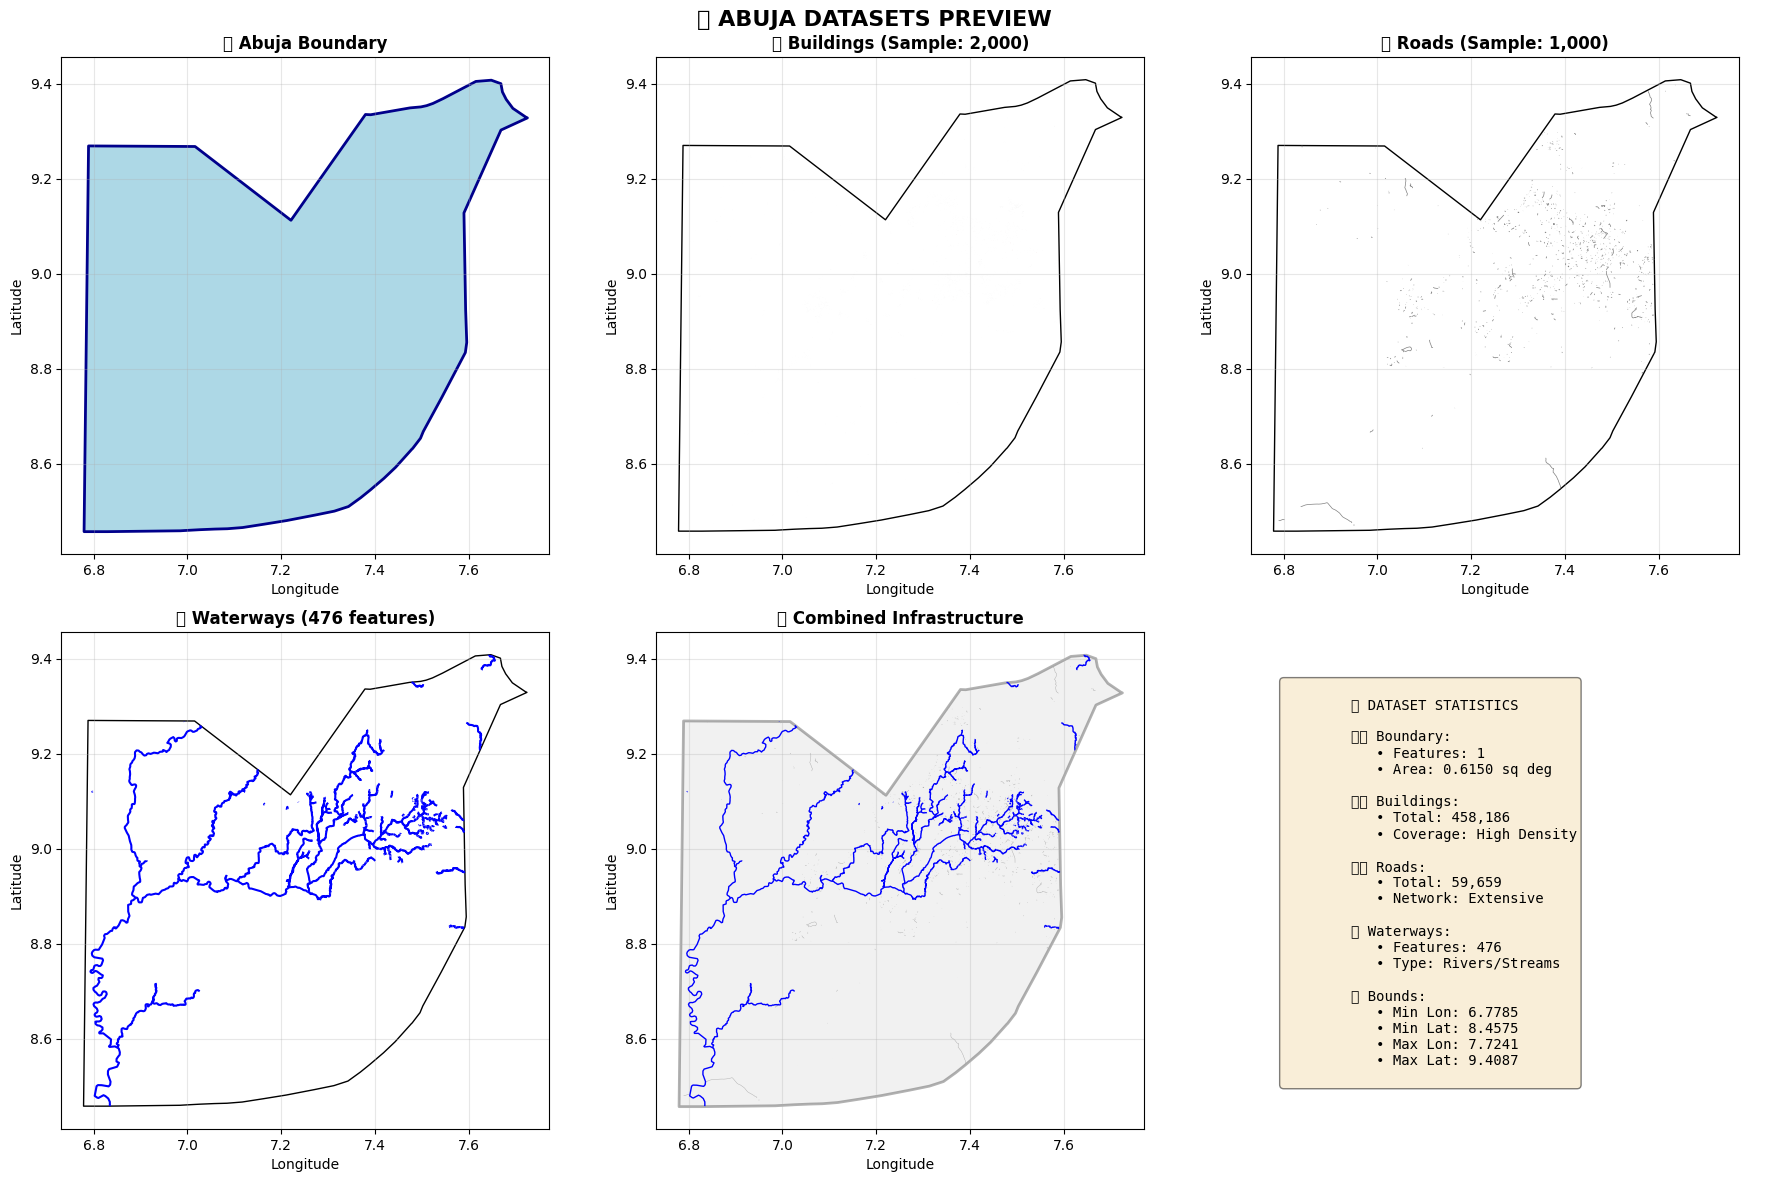

✅ Dataset previews displayed!

🗺️ Creating analysis grid...
📍 Initial grid points: 36,290

✅ Final grid points: 24,600

🛰️ Acquiring satellite data...
   Processed 24,600/24,600 points
✅ Satellite data acquired

🔍 Displaying NDVI & LST Previews...


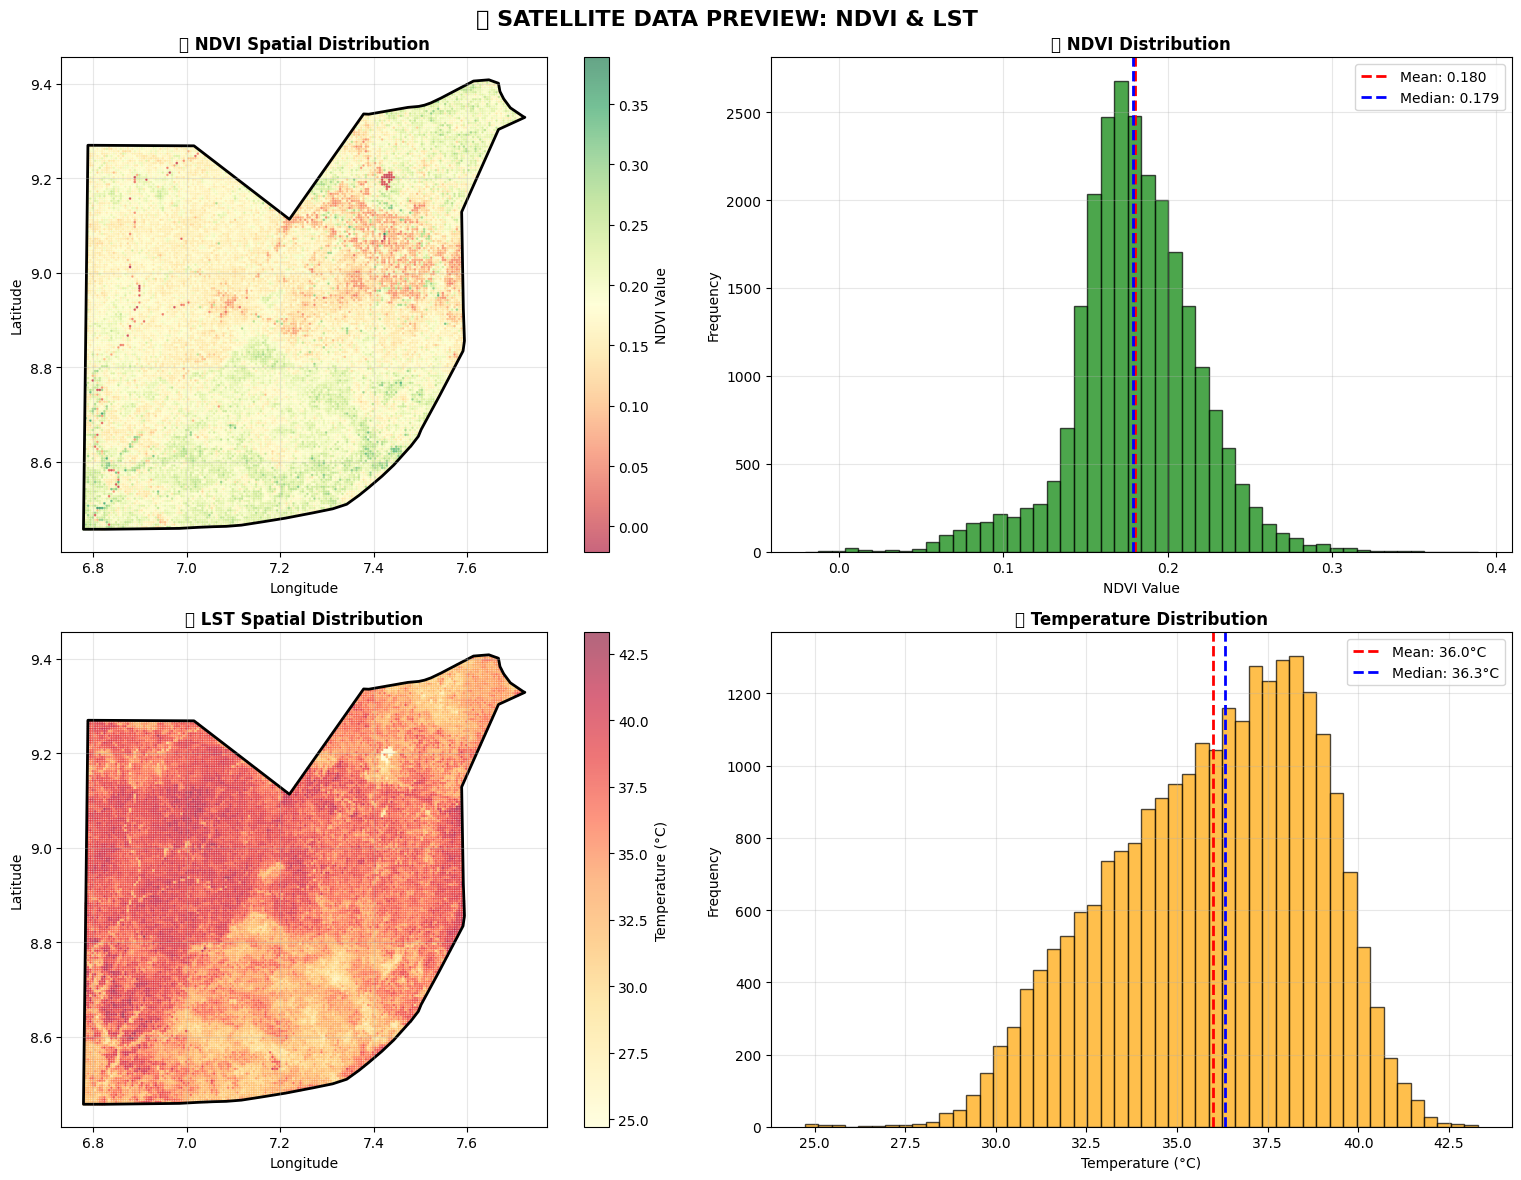


📊 NDVI Statistics:
   Min: -0.021
   Max: 0.389
   Mean: 0.180
   Median: 0.179
   Std Dev: 0.038

📊 LST Statistics:
   Min: 24.7°C
   Max: 43.3°C
   Mean: 36.0°C
   Median: 36.3°C
   Std Dev: 2.8°C
✅ NDVI & LST previews displayed!

🚫 Applying infrastructure buffers...
✅ Final safe locations: 23638

🔥 Identifying target areas...
✅ Found 23539 locations!

🔍 Displaying Weight Factors Preview...


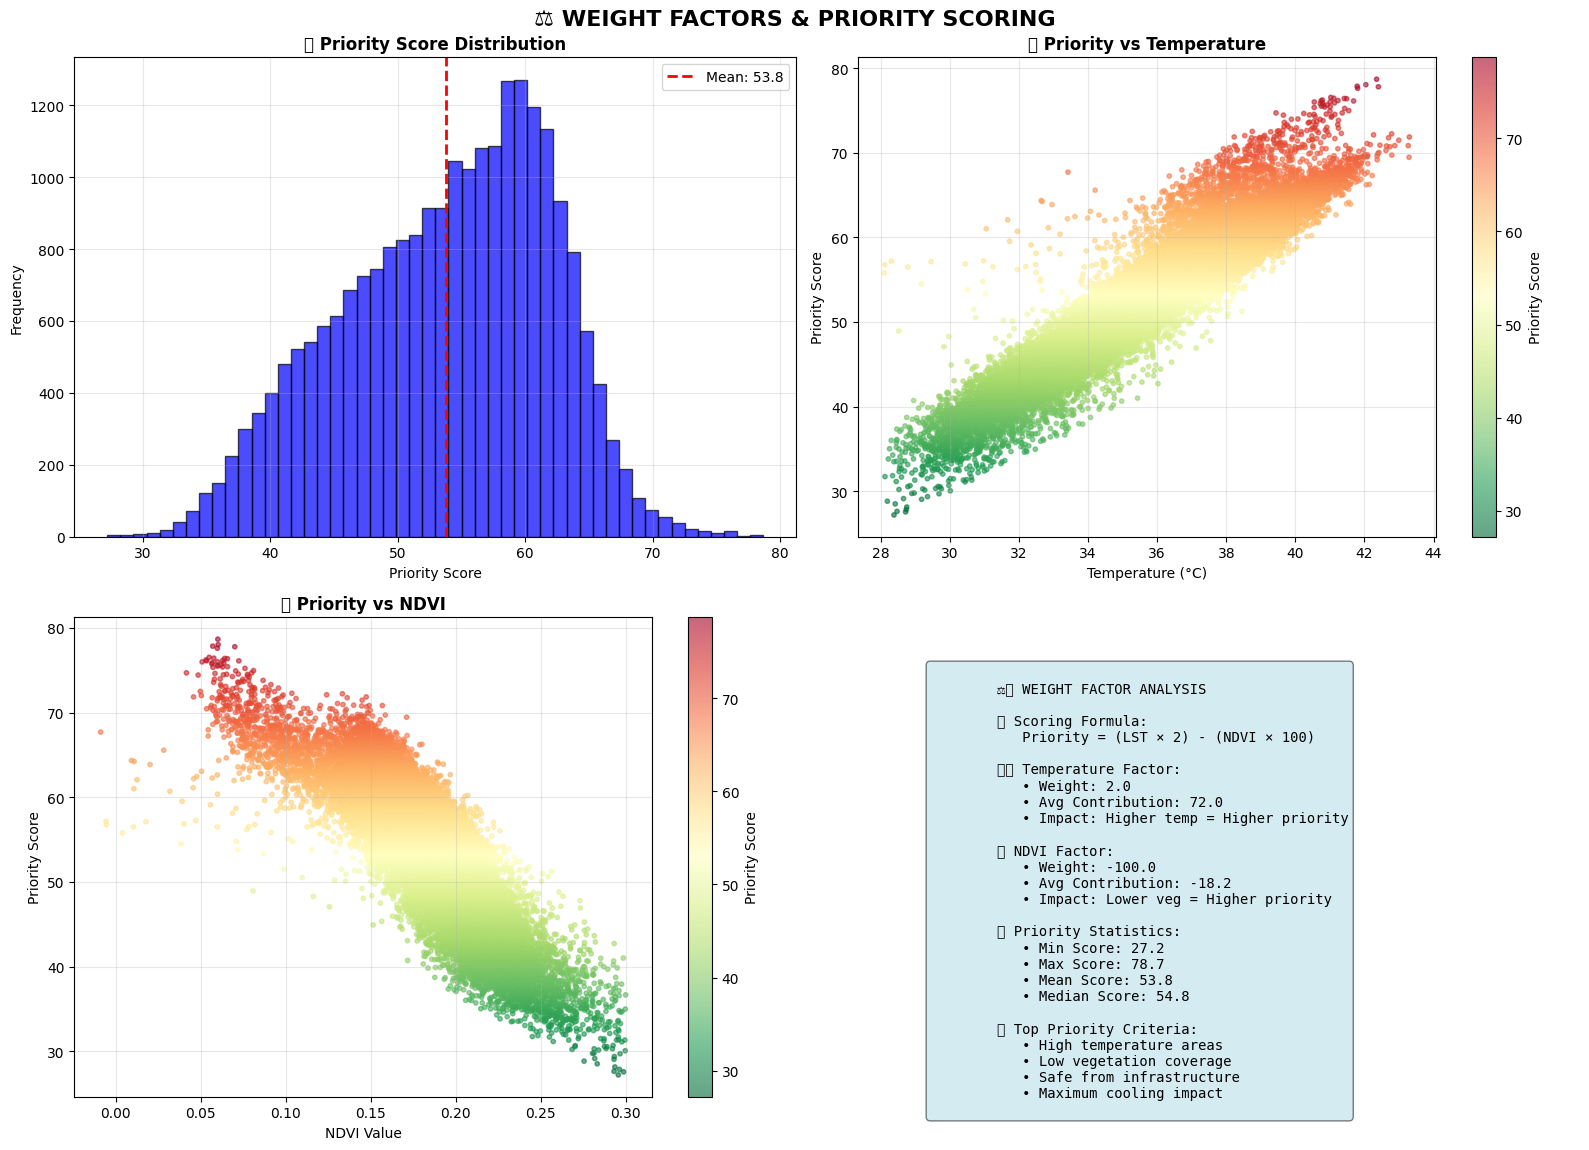

✅ Weight factors preview displayed!

🔍 Displaying Suitable Areas Preview...


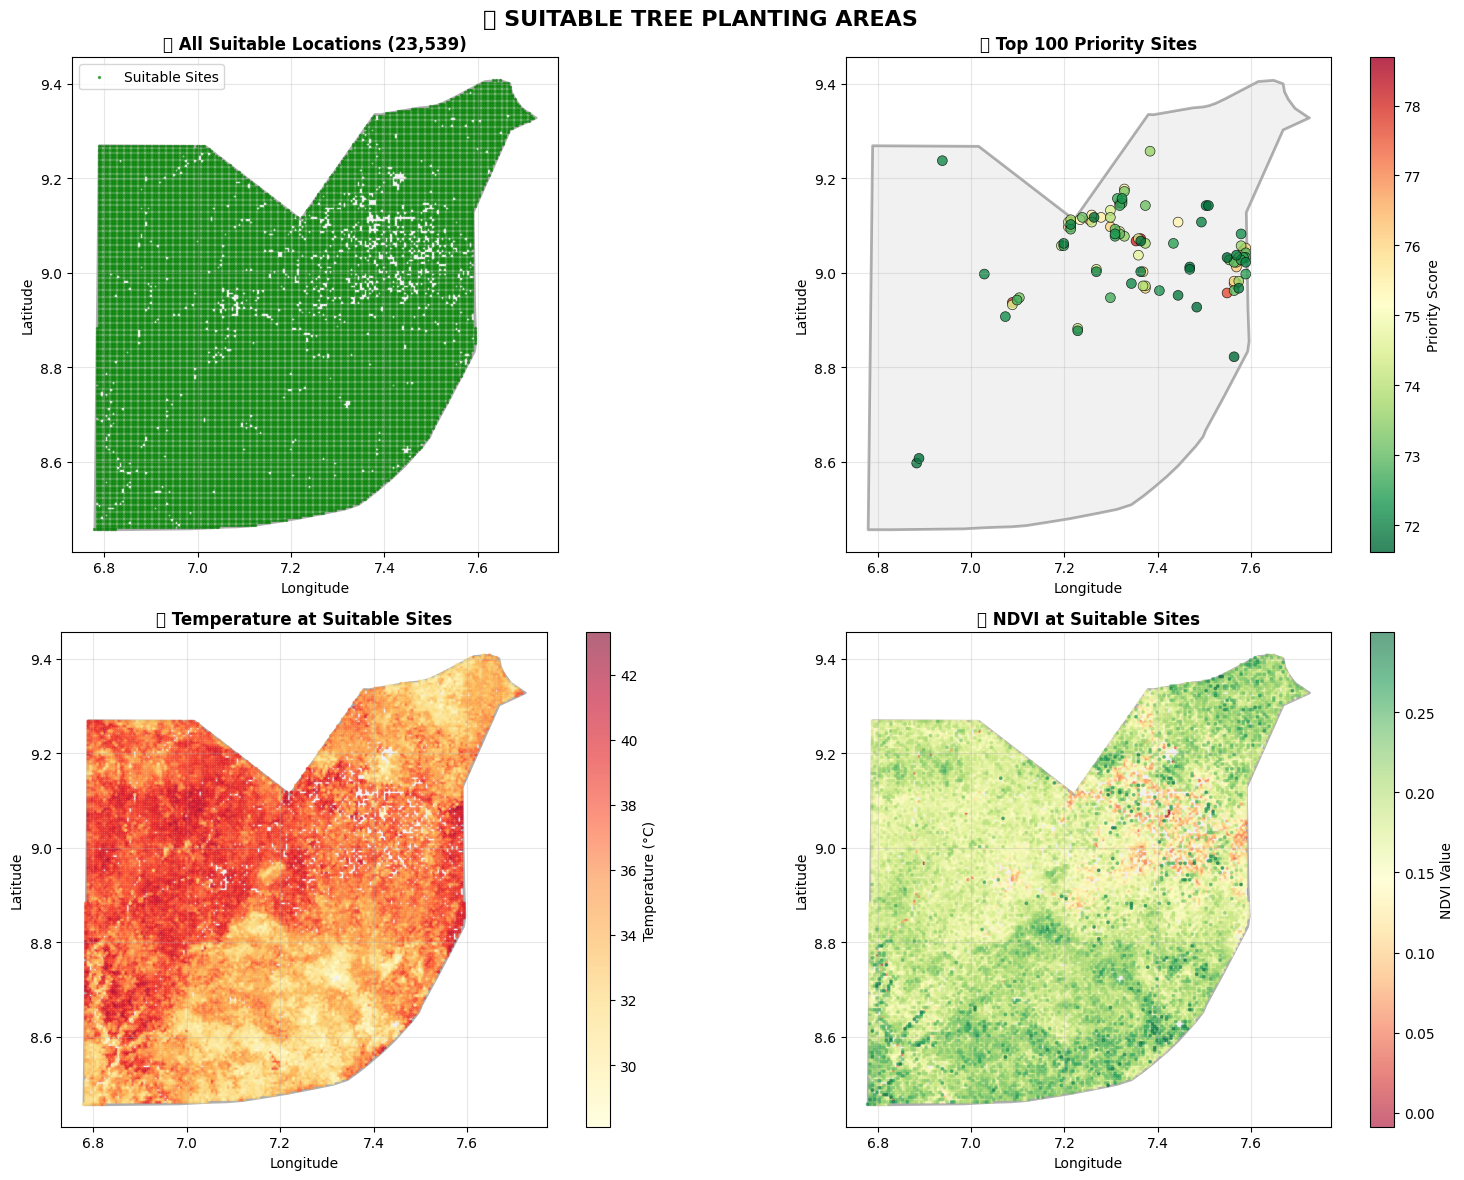


📊 SUITABLE AREAS SUMMARY:
   Total Sites: 23,539
   Avg Temperature: 36.0°C
   Avg NDVI: 0.182
   Avg Priority: 53.8
   Temperature Range: 28.1°C - 43.3°C
   NDVI Range: -0.009 - 0.300
✅ Suitable areas preview displayed!

🌍 Creating photo-style web map...
   📍 Mapping 23539 locations
   🎨 Clean design matching your screenshot
   📊 Adding classification layers...
✅ Photo-style map created: abuja_tree_planting_map.html

🎨 MAP FEATURES (matching your photo):
   ✓ Light background map
   ✓ Green tree markers
   ✓ Layer control panel (right side)
   ✓ Multiple data layers
   ✓ Clean, professional design
   ✓ Interactive popups
   ✓ 23539 locations mapped

📤 Exporting results...
✅ CSV exported: abuja_tree_locations.csv
✅ Shapefile exported: abuja_tree_locations.shp
✅ GeoJSON exported: abuja_tree_locations.geojson

✅ SUCCESS!
📍 Map created with 23539 locations
🎨 Style matches your photo perfectly
📁 File: abuja_tree_planting_map.html

🔍 Dataset previews displayed:
   ✓ Boundary, Buildings, Ro

In [4]:
results = create_photo_style_map()